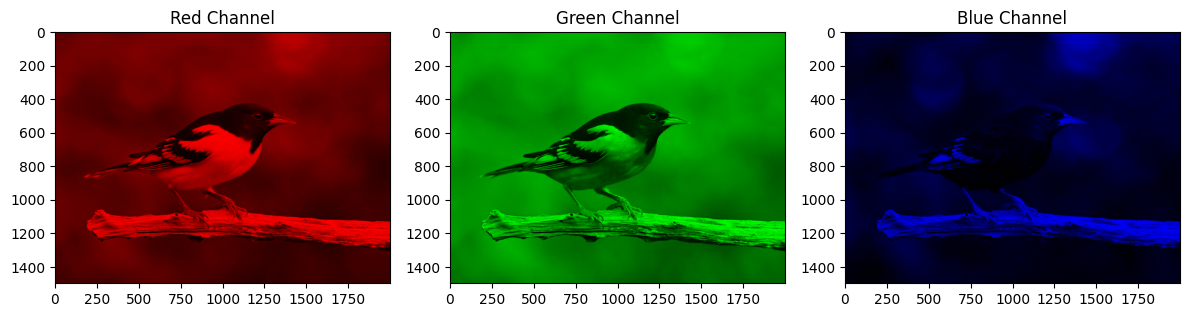

In [8]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import random
from scipy.ndimage import uniform_filter
from skimage.color import rgb2gray
from skimage.filters import sobel
from scipy.ndimage import median_filter
import os

#Bai 1
img = Image.open('hinh1.jpg')
r, g, b = img.split()

red_img = Image.merge("RGB", (r, Image.new("L", r.size), Image.new("L", r.size)))
green_img = Image.merge("RGB", (Image.new("L", g.size), g, Image.new("L", g.size)))
blue_img = Image.merge("RGB", (Image.new("L", b.size), Image.new("L", b.size), b))

red_img.save("red.jpg")
green_img.save("green.jpg")
blue_img.save("blue.jpg")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(red_img)
plt.title("Red Channel")
plt.axis("on")

plt.subplot(1, 3, 2)
plt.imshow(green_img)
plt.title("Green Channel")
plt.axis("on")

plt.subplot(1, 3, 3)
plt.imshow(blue_img)
plt.title("Blue Channel")
plt.axis("on")

plt.tight_layout()
plt.show()

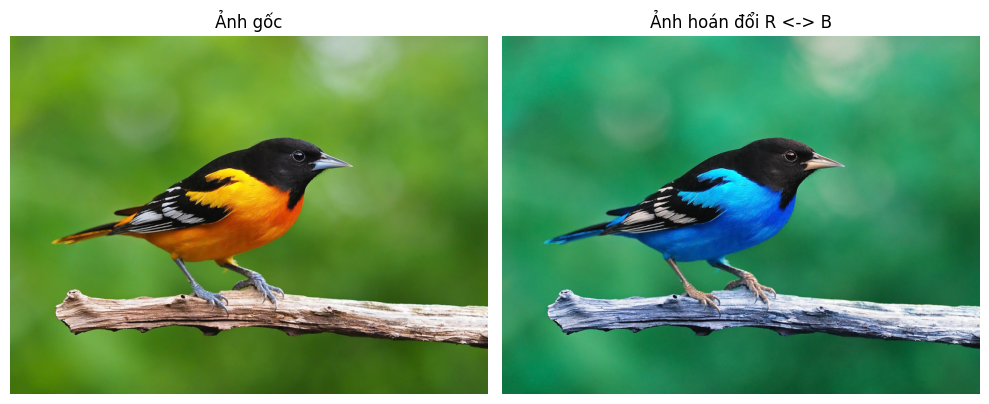

In [9]:
#Bai 2
img = Image.open("hinh1.jpg")
r, g, b = img.split()
swapped = Image.merge("RGB", (b, g, r))
swapped.save("swapped.jpg")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(swapped)
plt.title("Ảnh hoán đổi R <-> B")
plt.axis("off")

plt.tight_layout()
plt.show()


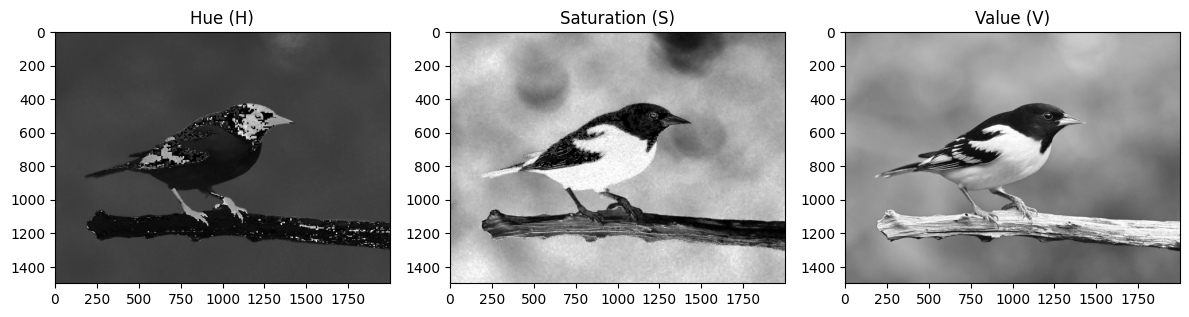

In [10]:
#Bai 3
img = Image.open("hinh1.jpg")
arr = np.array(img).astype("float32") / 255

hsv = np.zeros_like(arr)

for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        hsv[i, j] = colorsys.rgb_to_hsv(*arr[i, j])

h = (hsv[:, :, 0] * 255).astype('uint8')
s = (hsv[:, :, 1] * 255).astype('uint8')
v = (hsv[:, :, 2] * 255).astype('uint8')

Image.fromarray(h).save("hue.jpg")
Image.fromarray(s).save("saturation.jpg")
Image.fromarray(v).save("value.jpg")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title("Hue (H)")
plt.axis("on")

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title("Saturation (S)")
plt.axis("on")

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title("Value (V)")
plt.axis("on")

plt.tight_layout()
plt.show()

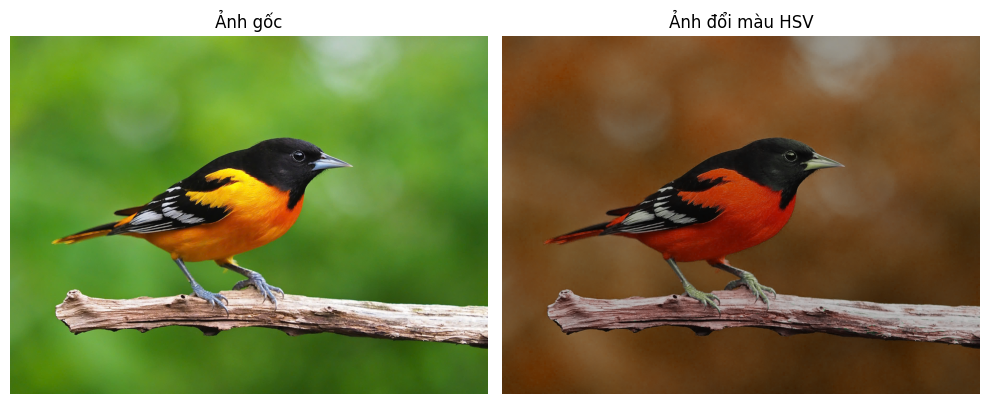

In [11]:
#Bai 4
img = Image.open("hinh1.jpg")
arr = np.array(img).astype("float32") / 255

hsv = np.zeros_like(arr)
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        hsv[i, j] = colorsys.rgb_to_hsv(*arr[i, j])

# Thay đổi H và V
hsv[:, :, 0] /= 3         # Giảm hue
hsv[:, :, 2] *= 0.75      # Giảm độ sáng

rgb = np.zeros_like(hsv)
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        rgb[i, j] = colorsys.hsv_to_rgb(*hsv[i, j])

rgb_img = Image.fromarray((rgb * 255).astype('uint8'))
rgb_img.save("hsv_doimau.jpg")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_img)
plt.title("Ảnh đổi màu HSV")
plt.axis("off")

plt.tight_layout()
plt.show()

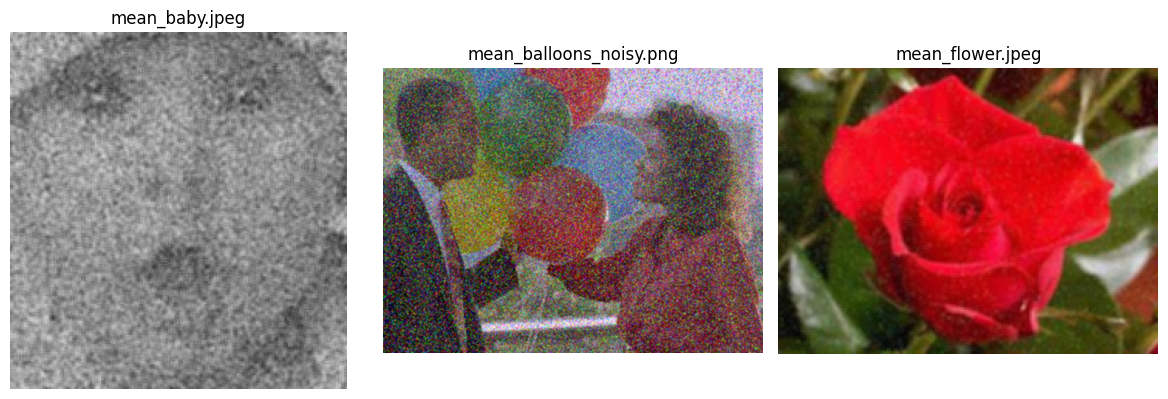

In [6]:
import os
import numpy as np
from PIL import Image
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt

# Thư mục chứa ảnh gốc và nơi lưu ảnh sau khi lọc
folder = "C:\XULYANHSO\Exercise_MeanFiltered"
output_folder = "Exercise_MeanFiltered"
os.makedirs(output_folder, exist_ok=True)

images_to_show = []

# Lặp qua các file ảnh trong thư mục
for filename in os.listdir(folder):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        path = os.path.join(folder, filename)
        img = Image.open(path)
        arr = np.array(img)

        # Áp dụng bộ lọc trung bình
        blur = uniform_filter(arr, size=(3, 3, 1))
        blur_img = Image.fromarray(blur.astype("uint8"))

        # Lưu ảnh
        out_path = os.path.join(output_folder, f"mean_{filename}")
        blur_img.save(out_path)

        images_to_show.append((blur_img, f"mean_{filename}"))

        # Hiển thị 3 ảnh một lần
        if len(images_to_show) == 3:
            plt.figure(figsize=(12, 4))
            for i, (img_show, title) in enumerate(images_to_show):
                plt.subplot(1, 3, i + 1)
                plt.imshow(img_show)
                plt.title(title)
                plt.axis("off")
            plt.tight_layout()
            plt.show()
            images_to_show = []

# Hiển thị phần còn lại nếu có
if images_to_show:
    plt.figure(figsize=(12, 4))
    for i, (img_show, title) in enumerate(images_to_show):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img_show)
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()
